Saving indian_food (2).csv to indian_food (2) (5).csv
First few rows of the dataset:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1  

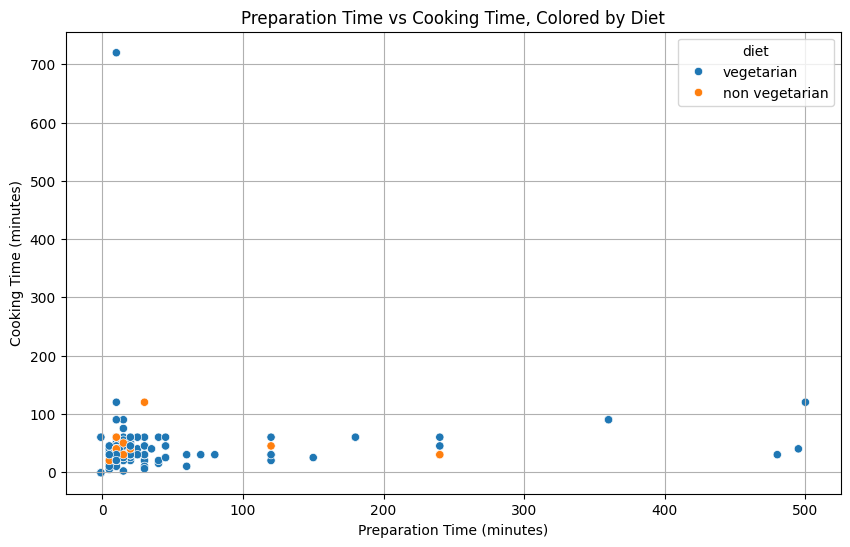

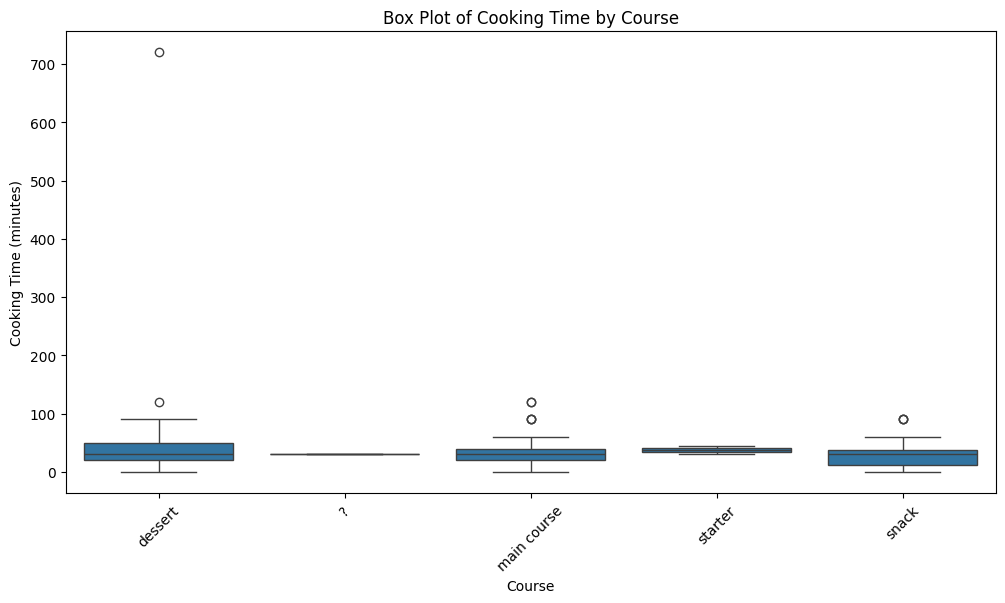

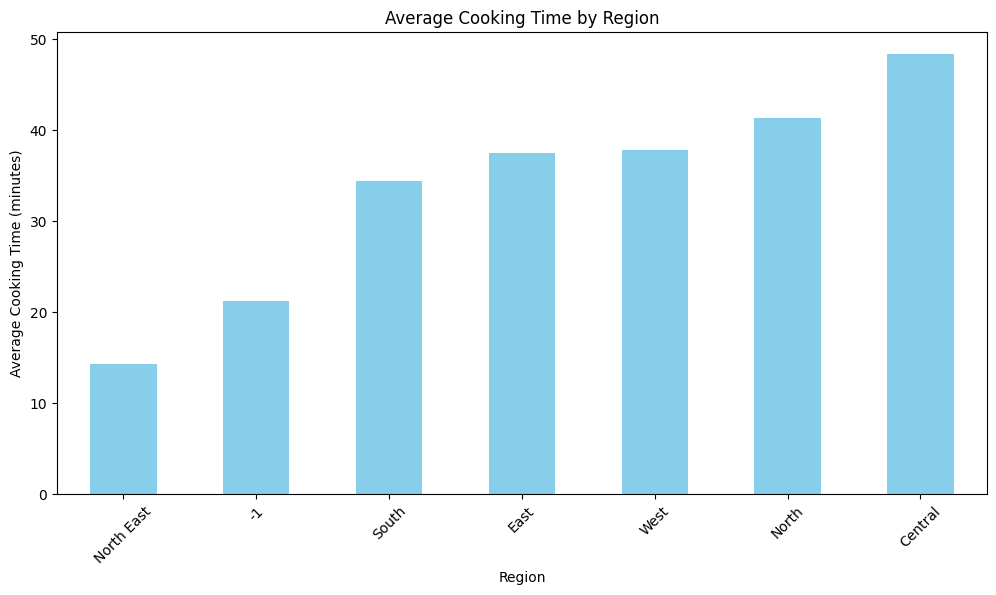

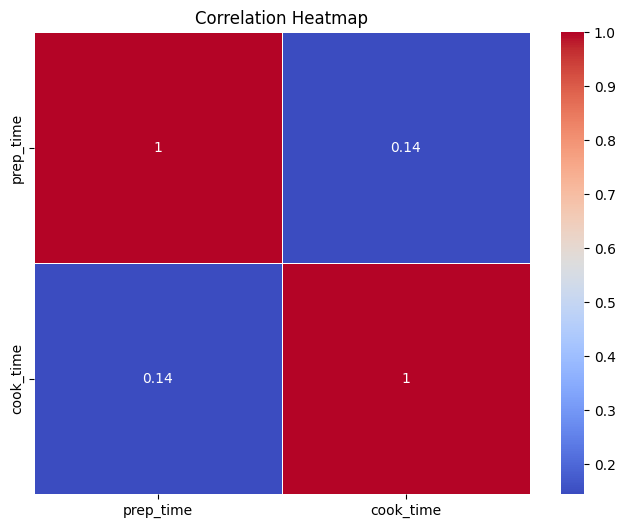

<ipython-input-8-e7b04ebb3691>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='flavor_profile', data=df, palette='Set2')


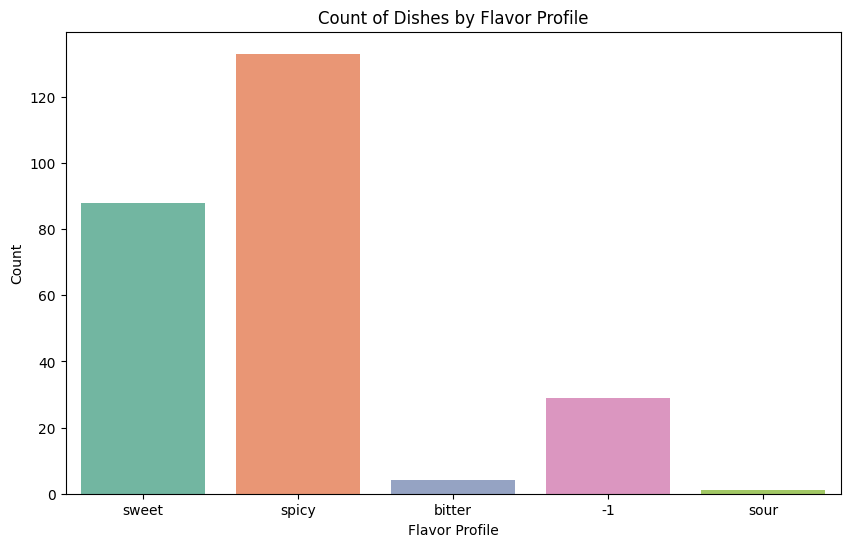

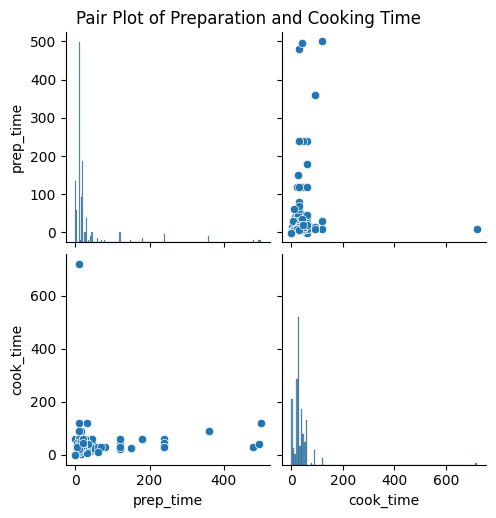

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload file or Mount Google Drive, depending on where your file is
from google.colab import files
uploaded = files.upload()  # Direct upload

# Load the dataset
file_path = next(iter(uploaded))  # This gets the filename
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert 'prep_time' and 'cook_time' to numeric, if necessary
df['prep_time'] = pd.to_numeric(df['prep_time'], errors='coerce')
df['cook_time'] = pd.to_numeric(df['cook_time'], errors='coerce')

# Drop rows with missing values in 'prep_time' and 'cook_time' for analysis
df.dropna(subset=['prep_time', 'cook_time'], inplace=True)

# Scatter plot for preparation time vs cooking time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prep_time', y='cook_time', hue='diet', data=df)
plt.title('Preparation Time vs Cooking Time, Colored by Diet')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.grid(True)
plt.show()

# Box plot of cooking time by course
plt.figure(figsize=(12, 6))
sns.boxplot(x='course', y='cook_time', data=df)
plt.title('Box Plot of Cooking Time by Course')
plt.xlabel('Course')
plt.ylabel('Cooking Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# Grouped bar plot to show average cooking time by region
region_avg_time = df.groupby('region')['cook_time'].mean().sort_values()
plt.figure(figsize=(12, 6))
region_avg_time.plot(kind='bar', color='skyblue')
plt.title('Average Cooking Time by Region')
plt.xlabel('Region')
plt.ylabel('Average Cooking Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# Heatmap of correlation matrix (only includes numeric columns)
numerical_df = df[['prep_time', 'cook_time']].dropna()
corr_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Count plot for flavor profile
plt.figure(figsize=(10, 6))
sns.countplot(x='flavor_profile', data=df, palette='Set2')
plt.title('Count of Dishes by Flavor Profile')
plt.xlabel('Flavor Profile')
plt.ylabel('Count')
plt.show()

# Pair plot to explore relationship between 'prep_time' and 'cook_time'
sns.pairplot(df[['prep_time', 'cook_time']])
plt.suptitle('Pair Plot of Preparation and Cooking Time', y=1.02)
plt.show()
